In [13]:
!pip install pandas matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.5 MB/s eta 0:00:00a 0:00:01
Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(500000, dtype = np.int64)

In [3]:
%%timeit

x = np.arange(500000, dtype = np.int64)

for i in x:
    x[i] = x[i] - 1

83.1 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit

x = np.arange(500000, dtype = np.int64)

x = [x[i] - 1 for i in range(len(x))]

42.1 ms ± 569 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
df = pd.read_csv("data/starter_data.csv")

df.head()

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [7]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [8]:
df[["category", "value"]].groupby(["category"]).sum()

,value
category,
A,46
B,47
C,83


In [9]:
df.describe().reset_index().to_csv("data/processed/summary.csv", index = False)

<Axes: xlabel='category'>

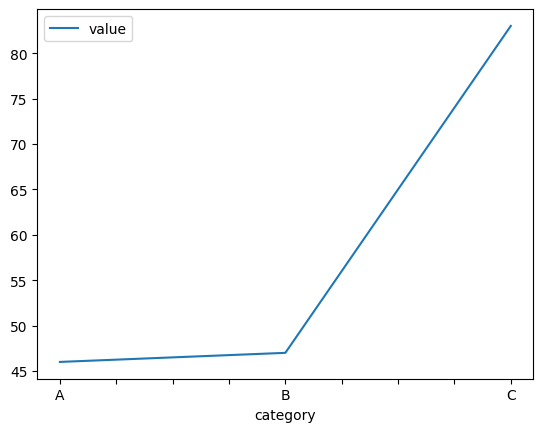

In [10]:
df[["category", "value"]].groupby(["category"]).sum().reset_index().plot(x = "category", y = "value")

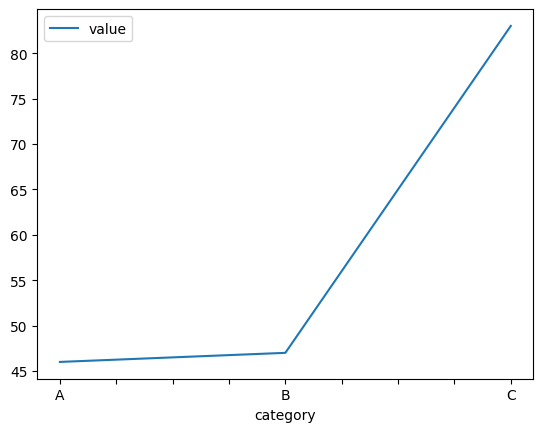

In [11]:
ax = df[["category", "value"]].groupby(["category"]).sum().reset_index().plot(x = "category", y = "value").get_figure().savefig("plot.png")

In [12]:
from src.utils import get_summary_stats

x = get_summary_stats(df)
x

,index,value
0,count,10.000000
1,mean,17.600000
2,std,7.381659
3,min,10.000000
4,25%,12.250000
5,50%,14.500000
6,75%,23.250000
7,max,30.000000
